In [1]:
# libraries
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

In [2]:
# API connecting:
headers = {'':""}  #your api key
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/categories' 
parametrs = {"start":"1",       # starting from the first coin
             "limit" : "500"} # coin/usd pairs
response = requests.get('https://pro-api.coinmarketcap.com/v1/cryptocurrency/categories', headers=headers, params = parametrs)
response.status_code

200

In [3]:
raw_data = response.json()
data = raw_data["data"]  # getting list with coins
data[0]      

{'id': '62bad476c8261218d38931dc',
 'name': 'Everscale Ecosystem',
 'title': 'Everscale Ecosystem',
 'description': 'Everscale Ecosystem',
 'num_tokens': 6,
 'avg_price_change': 4.411136766666666,
 'market_cap': 215372344.19,
 'market_cap_change': 1.8356833333333331,
 'volume': 7490655.248230111,
 'volume_change': 11.049,
 'last_updated': '2022-06-28T10:15:55.287Z'}

In [4]:
# options to see more columns and rows in df
pd.options.display.max_columns = 20
pd.options.display.max_rows = 150

# to df
categories = pd.DataFrame(data)

# new df with less columns
categories_f =categories[["name","num_tokens","market_cap","market_cap_change", "volume", "volume_change"]].copy()

In [5]:
# convert to billions
categories_f["market_cap"] = round(categories_f["market_cap"]/1000000000,2)
categories_f["volume"] = round(categories_f["volume"]/1000000000,2)

# all numbers round to 2 dec
new_cat = categories_f.round(2)

In [6]:
# describes % of volume from market cap
new_cat["mc_vs_vol"] = round(new_cat["volume"]/new_cat["market_cap"]*100,2)
new_cat

,name,num_tokens,market_cap,market_cap_change,volume,volume_change,mc_vs_vol
0,Everscale Ecosystem,6,0.22,1.84,0.01,11.05,4.55
1,XDC Ecosystem,10,0.31,-0.23,0.01,1661.03,3.23
2,Tokenized Gold,5,1.05,0.01,0.02,105.54,1.90
3,EUR Stablecoin,6,0.16,-0.47,0.03,2694.43,18.75
4,USD Stablecoin,31,152.85,-0.41,56.21,104.74,36.77
...,...,...,...,...,...,...,...
155,BNB Chain Ecosystem,2015,412.86,0.65,83.67,228.40,20.27
156,NFTs & Collectibles,590,18.39,1.63,3.64,341.95,19.79
157,Polkadot Ecosystem,116,13.03,1.04,1.43,54.59,10.97
158,Storage,39,3.75,0.76,0.34,50.15,9.07


In [7]:
# sort, count mean and median of market cap
sorte = new_cat.sort_values(by="market_cap")
sorted_mean = sorte["market_cap"].mean()
sorted_median = sorte["market_cap"].median()

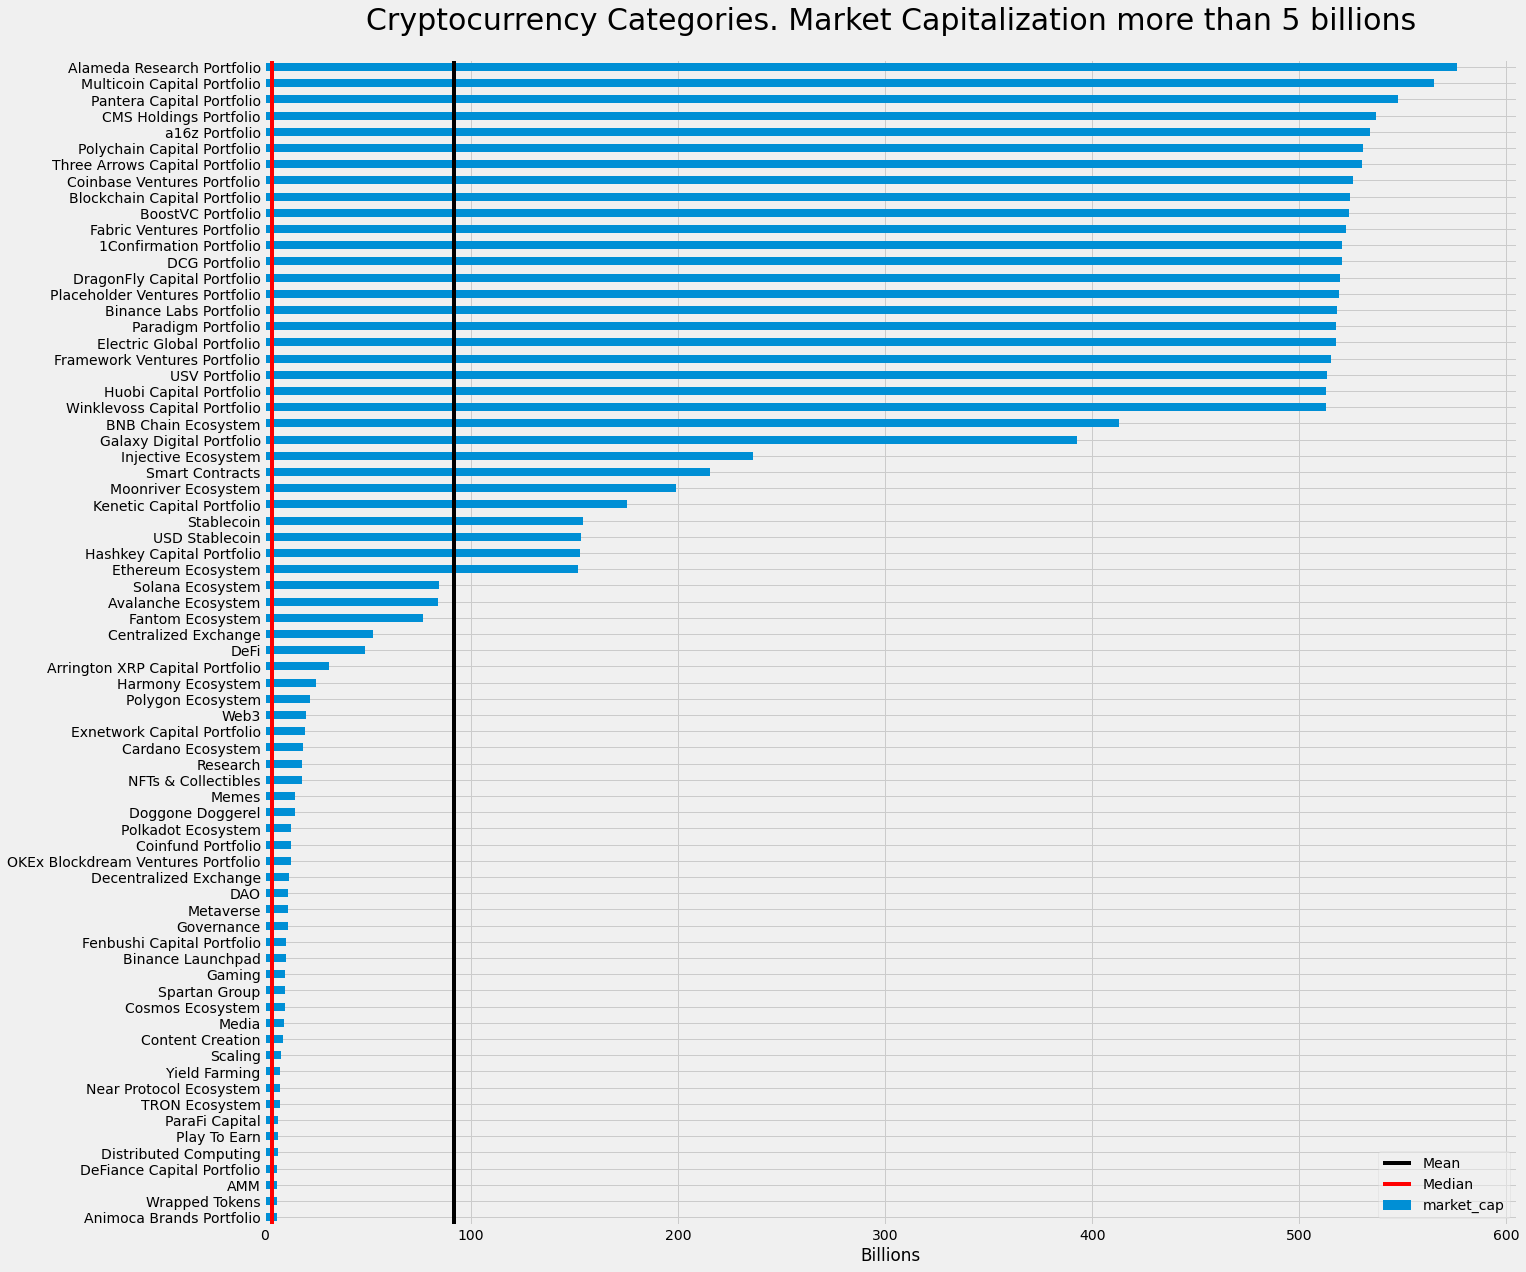

In [8]:
#visualization
plt.style.use('fivethirtyeight')
sorte[sorte["market_cap"]>5].plot.barh(y="market_cap", x="name", figsize =(20,20))
plt.title("Cryptocurrency Categories. Market Capitalization more than 5 billions", y= 1.02, size = 30)
plt.ylabel('')
plt.xlabel("Billions")
plt.axvline(sorted_mean, color="black", label="Mean")
plt.axvline(sorted_median, color="red", label = "Median")
plt.legend(framealpha = 0.5, loc="lower right")
plt.savefig("MC", bbox_inches = "tight")
plt.show()

In [9]:
# exclude portfolio and ecosystemns and leaves only groups without expensive coins like bitcoin
f=(new_cat["name"].str.contains("Portfolio") == False) & (new_cat["name"].str.contains("Ecosystem") == False)  #bool filter
cleaned = new_cat[f].sort_values(by="market_cap")
cleaned_mean = cleaned["market_cap"].mean()
cleaned_median = cleaned["market_cap"].median()


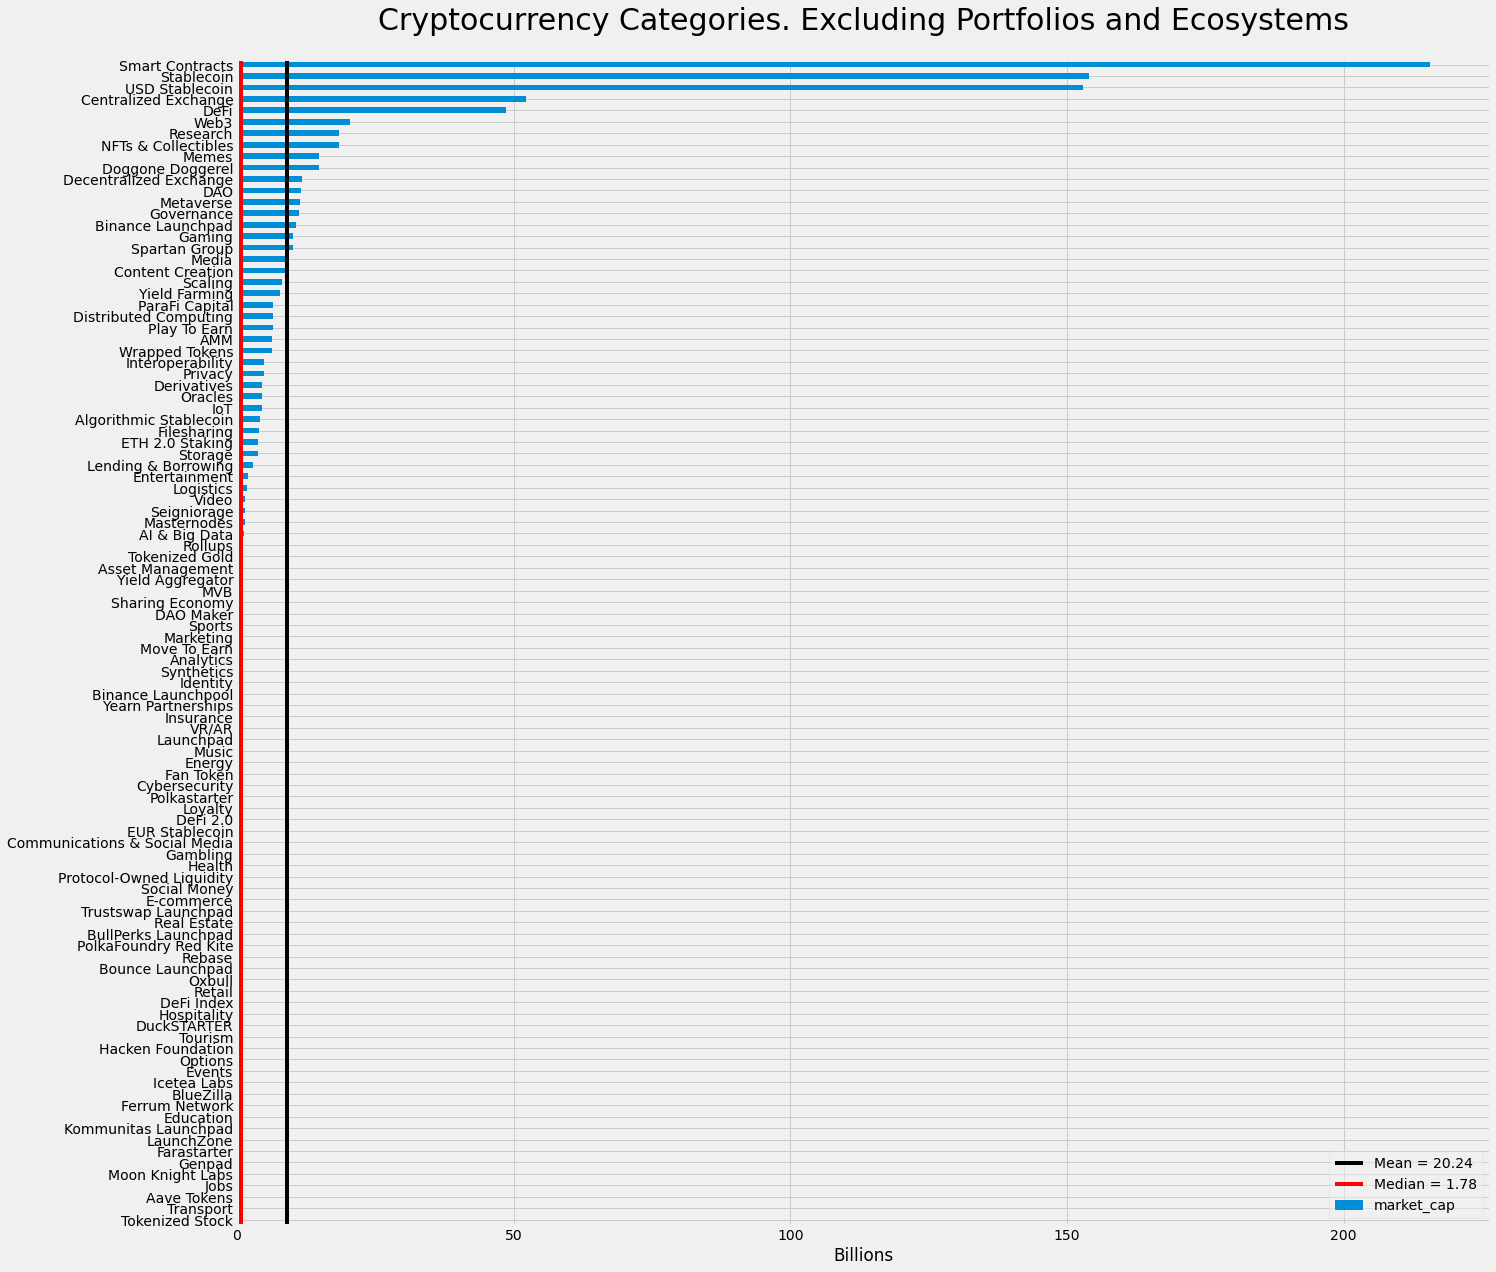

In [10]:
#visualization
plt.style.use('fivethirtyeight')
cleaned.plot.barh(y="market_cap", x="name", figsize =(20,20))
plt.title("Cryptocurrency Categories. Excluding Portfolios and Ecosystems", y= 1.02, size = 30)
plt.ylabel('')
plt.xlabel("Billions")
plt.axvline(cleaned_mean, color="black", label="Mean = 20.24")
plt.axvline(cleaned_median, color="red", label = "Median = 1.78")
plt.legend(framealpha = 0.5, loc="lower right")
plt.savefig("Cleaned", bbox_inches = "tight")
plt.show()